# Principal Component Analysis (PCA)

During the parameter hypertuning process, we encountered a computational challenge due to the large number of iterations required, leading to significant time consumption. To address this issue and streamline our analysis, we turned to Principal Component Analysis (PCA) to reduce the dimensionality of our extensive feature dataset.

### Data Preparation and Standardization

We start the process by importing essential libraries and removing the 'id' column.and examining our dataset. 

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

import pandas as pd
import numpy as np
from kfold_and_metrics import get_k_folds

import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv("final.csv")
df = df.drop(columns=["id"])
df.head()

,patient_id,diagnostics_Image-original_Mean,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,diagnostics_Image-interpolated_Mean,diagnostics_Image-interpolated_Minimum,diagnostics_Image-interpolated_Maximum,diagnostics_Mask-interpolated_VoxelNum,diagnostics_Mask-interpolated_VolumeNum,diagnostics_Mask-interpolated_Maximum,...,diagnostics_Mask-interpolated_BoundingBox_2,diagnostics_Mask-interpolated_BoundingBox_3,diagnostics_Mask-interpolated_BoundingBox_4,diagnostics_Mask-interpolated_BoundingBox_5,diagnostics_Mask-interpolated_CenterOfMassIndex_0,diagnostics_Mask-interpolated_CenterOfMassIndex_1,diagnostics_Mask-interpolated_CenterOfMassIndex_2,diagnostics_Mask-interpolated_CenterOfMass_0,diagnostics_Mask-interpolated_CenterOfMass_1,diagnostics_Mask-interpolated_CenterOfMass_2
0,LIDC-IDRI-0001,-826.943929,5905,1,-417.494203,-990.291016,1038.270874,909,2,237.087921,...,0.0,13.0,11.0,10.0,17.041265,16.108666,4.184319,128.652843,34.787644,-229.881362
1,LIDC-IDRI-0001,-826.943929,4613,1,-405.581777,-982.456726,949.768005,699,1,221.953705,...,0.0,13.0,11.0,10.0,17.041265,16.108666,4.184319,128.652843,34.787644,-229.881362
2,LIDC-IDRI-0001,-826.943929,4955,1,-410.236759,-990.291016,1038.270874,772,1,237.087921,...,0.0,13.0,11.0,10.0,17.041265,16.108666,4.184319,128.652843,34.787644,-229.881362
3,LIDC-IDRI-0001,-826.943929,5498,1,-416.576321,-990.291016,1038.270874,841,2,237.087921,...,0.0,13.0,11.0,10.0,17.041265,16.108666,4.184319,128.652843,34.787644,-229.881362
4,LIDC-IDRI-0002,-826.943929,10351,1,-546.359139,-1007.657349,1020.174988,749,1,160.687653,...,0.0,13.0,11.0,10.0,17.041265,16.108666,4.184319,128.652843,34.787644,-229.881362


### PCA and Explained Variance

To perform PCA, we adopted a k-fold separation approach for alternating the testing set. We also standardized the features to ensure a consistent scale (mean = 0 and variance = 1). For each fold, we visualized how the explained variation in the initial 1332 features changed as we considered an increasing number of principal components.

Text(0, 0.5, 'Explained Variance')

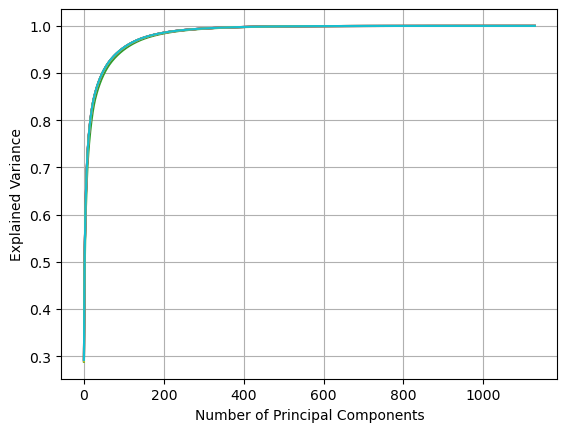

In [3]:
folds = get_k_folds(df)

for k in range(10): 
    testing_df = folds[k]
    training_df = pd.DataFrame(columns=folds[k].columns)
    for fold_index, fold_df in enumerate(folds):
        if fold_index == k:
            continue
        training_df = pd.concat([training_df, fold_df], ignore_index=True)
    label_encoder = LabelEncoder()
    X_train, y_train = training_df.drop(columns=['malignancy']), label_encoder.fit_transform(training_df['malignancy'])
    X_test, y_test = testing_df.drop(columns=['malignancy']), label_encoder.fit_transform(testing_df['malignancy'])

    # standardization
    scaler = StandardScaler()
    scaler.fit(X_train)
    train_x_norm = scaler.transform(X_train)

    pca = PCA()
    comp = pca.fit(train_x_norm)

    # plotting
    plt.plot(np.cumsum(comp.explained_variance_ratio_))
    
plt.grid()
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')

### Results and Dimensionality Reduction

The analysis revealed that the first 50 principal components already capture approximately 90% of the dataset's variation. For this project, however, we made the decision to retain the first 100 principal components, which explained around 95% of the variance.

This dimensionality reduction through PCA allows us to work with a more manageable feature set while retaining a significant portion of the original data's variance.

In [4]:
print(np.sum(comp.explained_variance_ratio_[0:50]))
print(np.sum(comp.explained_variance_ratio_[0:100]))

0.9053642252923412
0.9539245493095112
